In [1]:
# Name:Nirmal Gajera (5626924)
# House Price prediction
#basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from plotly import tools
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
# %matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import lightgbm as  lgb
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
seed = 4432


In [2]:
#Import dataset
#path = 'dataset/'
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Number of rows and columns in train dataset:', train.shape)
print('Number of rows and columns in test dataset:', test.shape)

Number of rows and columns in train dataset: (1460, 81)
Number of rows and columns in test dataset: (1459, 80)


In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
#check the decoration
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [7]:
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [8]:
#check the decoration
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train['MSSubClass'] = train['MSSubClass'].astype('str')
test['MSSubClass']  = test['MSSubClass'].astype('str')
categorical_cols = train.select_dtypes([np.object]).columns

In [10]:
for col in categorical_cols:
    cat_train = train[col].unique().tolist()
    cat_test = test[col].unique().tolist()
    cat_nan = list(set().union(cat_train,cat_test))
    cat = [x for x in cat_nan if str(x) != 'nan']
    train[col] = train[col].astype('category', categories = cat)
    test[col]  = test[col].astype('category', categories = cat)
X = train.drop(['SalePrice', 'Id'], axis = 1)
train_labels = train['SalePrice'].values

In [11]:
#proportion of NaN in each column
count_var_nulls = X.isnull().sum(axis = 0)/X.shape[0]
variable_nulls = count_var_nulls[count_var_nulls >0]
print('variables with NaN:')
print(variable_nulls)
print('-----')
#remove columns with more than 50% of NaN
remove_variables_index = list(variable_nulls[variable_nulls > 0.5].index)
variable_nulls.drop(remove_variables_index, inplace = True)  #prepro remove_variables_index

variables with NaN:
LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64
-----


Missing value in 19 columns and no missing value in 62 columns


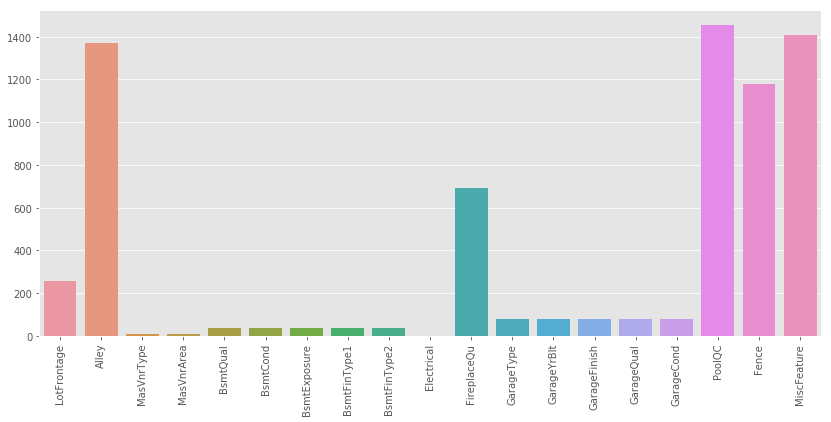

In [12]:
no_missing_col = [c for c in train.columns if train[c].isnull().sum() ==0]
missing_col = [c for c in train.columns if train[c].isnull().sum() >0]
print(f'Missing value in {len(missing_col)} columns and no missing value in {len(no_missing_col)} columns')

missing = train[missing_col].isnull().sum()
plt.figure(figsize=(14,6))
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation=90);

Missing value in 33 columns and no missing value in 47 columns


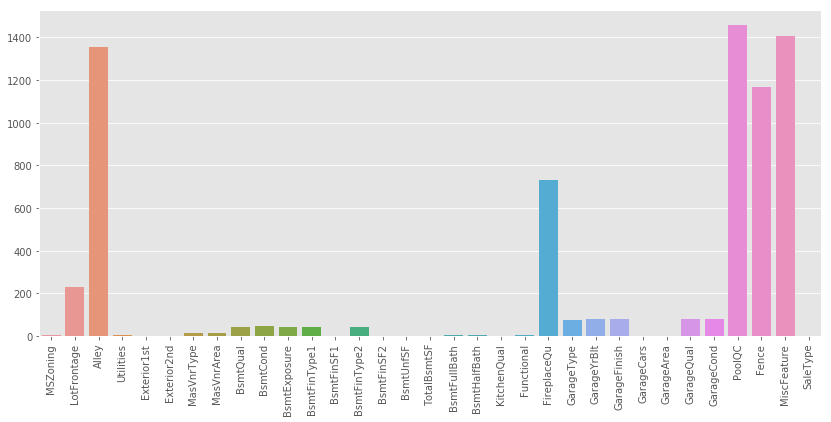

In [13]:
no_missing_col = [c for c in test.columns if test[c].isnull().sum() ==0]
missing_col = [c for c in test.columns if test[c].isnull().sum() >0]
print(f'Missing value in {len(missing_col)} columns and no missing value in {len(no_missing_col)} columns')

missing = test[missing_col].isnull().sum()
plt.figure(figsize=(14,6))
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation=90);

In [14]:
def prepro_nan_columns(x):
    x.drop(remove_variables_index, axis =1,  inplace = True)

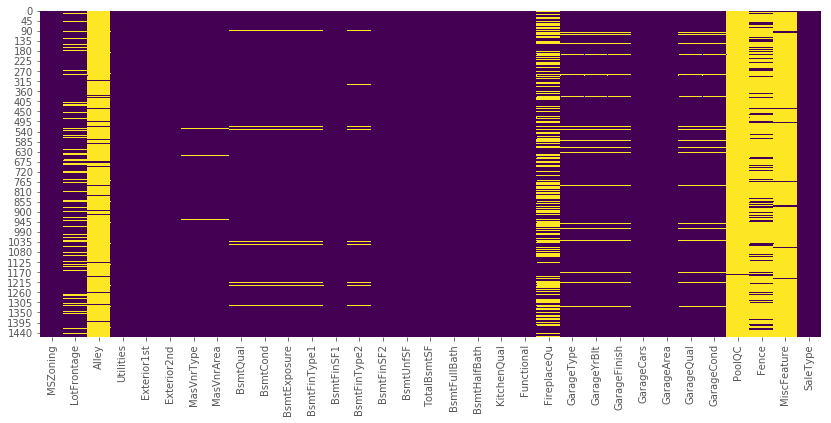

In [15]:
missing = train[missing_col].isnull()
plt.figure(figsize =(14,6))
sns.heatmap(missing, cbar=False, cmap='viridis')

In [16]:
prepro_nan_columns(X)

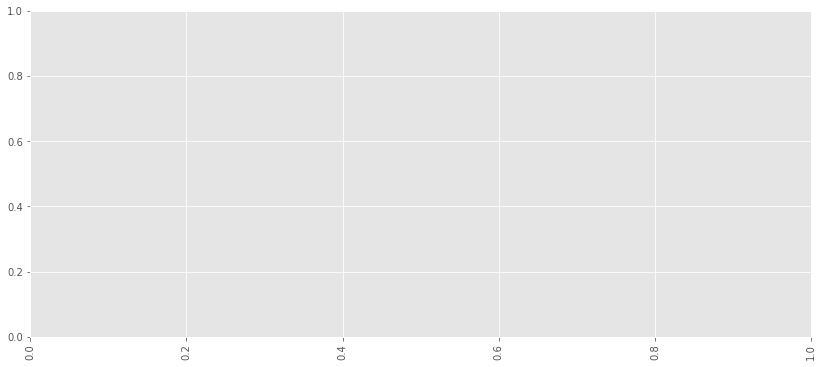

In [17]:
no_missing_col = [c for c in test.columns if test[c].isnull().sum() ==0]
missing_col = [c for c in test.columns if test[c].isnull().sum() >0]

missing = test[missing_col].isnull().sum()
plt.figure(figsize=(14,6))
plt.xticks(rotation=90);

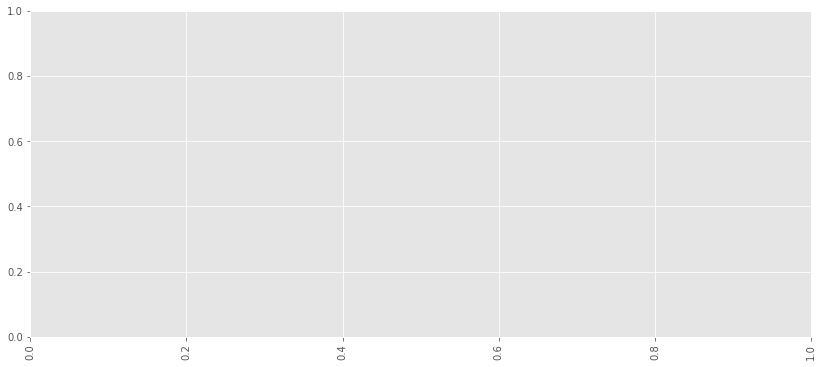

In [18]:
no_missing_col = [c for c in train.columns if train[c].isnull().sum() ==0]
missing_col = [c for c in train.columns if train[c].isnull().sum() >0]

missing = train[missing_col].isnull().sum()
plt.figure(figsize=(14,6))
plt.xticks(rotation=90);

In [19]:
#proportion of NaN in each column
count_var_nulls = X.isnull().sum(axis = 0)/X.shape[0]
variable_nulls = count_var_nulls[count_var_nulls >0]
print('variables with NaN:')
print(variable_nulls)
print('-----')

variables with NaN:
LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64
-----


In [20]:
#remove columns with more than 50% of NaN
remove_variables_index = list(variable_nulls[variable_nulls > 0.5].index)
variable_nulls.drop(remove_variables_index, inplace = True)  #prepro remove_variables_index
def prepro_nan_columns(x):
    x.drop(remove_variables_index, axis =1,  inplace = True)

In [21]:
prepro_nan_columns(X)

In [22]:
print('remaining variables with NaN after dropping those with more than 50% missing:')
variable_nulls
count_obs_nulls = X.isnull().sum(axis = 1)/X.shape[1]
obs_nulls = count_obs_nulls[count_obs_nulls >0]
remove_obs_index = list(obs_nulls[obs_nulls > 0.5].index)
X.drop(remove_obs_index, axis = 1, inplace = True)
print(len(remove_obs_index),' observations removed because of having more than 50% of null values' )

remaining variables with NaN after dropping those with more than 50% missing:
0  observations removed because of having more than 50% of null values


In [23]:
#proportion of NaN in each column
count_var_nulls = X.isnull().sum(axis = 0)/X.shape[0]
variable_nulls = count_var_nulls[count_var_nulls >0]
print('variables with NaN:')
print(variable_nulls)

variables with NaN:
LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64


In [24]:
#prepro
def prepro_nan_imputing_categorical(x):
    x['MasVnrType'] =  x['MasVnrType'].fillna('None')
    
    aux_list = ['BsmtQual', 
                  'BsmtCond', 
                  'BsmtExposure',
                  'BsmtFinType1',
                  'BsmtFinType2',
                  'GarageType', 
                  'GarageFinish',
                  'GarageQual', 
                  'GarageCond',
                  'FireplaceQu']
    for i in aux_list:
        x[i] = x[i].cat.add_categories(['NA']).fillna('NA')

    x['Electrical']  = x['Electrical'].fillna(train['Electrical'].value_counts().idxmax())
    x['MSZoning']    = x['MSZoning'].fillna(train['MSZoning'].value_counts().idxmax())
    x['Exterior1st'] = x['Exterior1st'].fillna(train['Exterior1st'].value_counts().idxmax())
    x['Exterior2nd'] = x['Exterior2nd'].fillna(train['Exterior2nd'].value_counts().idxmax())
    x['Utilities']   = x['Utilities'].fillna(train['Utilities'].value_counts().idxmax())
    x['KitchenQual'] = x['KitchenQual'].fillna(train['KitchenQual'].value_counts().idxmax())
    x['Functional']  = x['Functional'].fillna(train['Functional'].value_counts().idxmax())
    x['SaleType']    = x['SaleType'].fillna(train['SaleType'].value_counts().idxmax())

In [25]:
prepro_nan_imputing_categorical(X)

In [26]:
#proportion of NaN in each column
count_var_nulls = X.isnull().sum(axis = 0)/X.shape[0]
variable_nulls  = count_var_nulls[count_var_nulls >0]
print('variables with NaN:')
print(variable_nulls)


variables with NaN:
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64


In [27]:
#prepro
def prepro_outliers(x):
    x.loc[x['LotArea']>100000, 'LotArea']          = np.nanmedian(train['LotArea'])
    x.loc[x['LotFrontage']>250, 'LotFrontage']     = np.nanmedian(train['LotFrontage'])
    x.loc[x['1stFlrSF']>4000, '1stFlrSF']          = np.nanmedian(train['1stFlrSF'])
    x.loc[x['BsmtFinSF1']>5000, 'BsmtFinSF1']      = np.nanmedian(train['BsmtFinSF1'])
    x.loc[x['BsmtFinSF2']>1400, 'BsmtFinSF2']      = np.nanmedian(train['BsmtFinSF2'])
    x.loc[x['EnclosedPorch']>500, 'EnclosedPorch'] = np.nanmedian(train['EnclosedPorch'])
    x.loc[x['GrLivArea']>5000, 'GrLivArea']        = np.nanmedian(train['GrLivArea'])
    x.loc[x['TotalBsmtSF']>6000, 'TotalBsmtSF']    = np.nanmedian(train['TotalBsmtSF'])
    x.loc[x['WoodDeckSF']>800, 'WoodDeckSF']       = np.nanmedian(train['WoodDeckSF'])


In [28]:
prepro_outliers(X)

In [29]:
numeric_cols = X.select_dtypes(include = [np.number]).columns
categorical_cols = X.select_dtypes([np.object]).columns

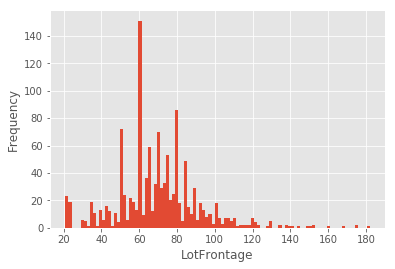

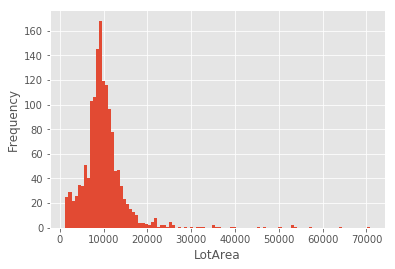

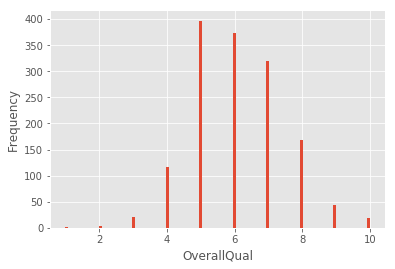

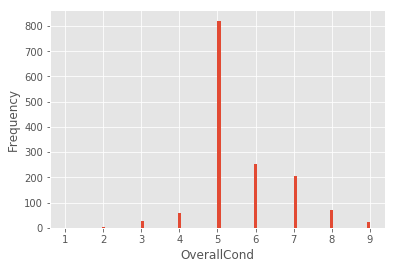

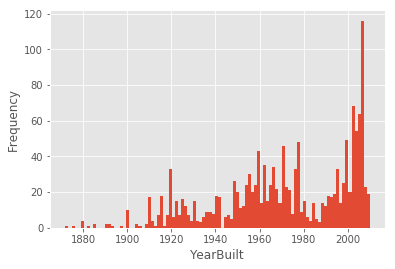

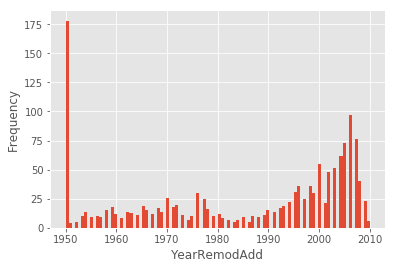

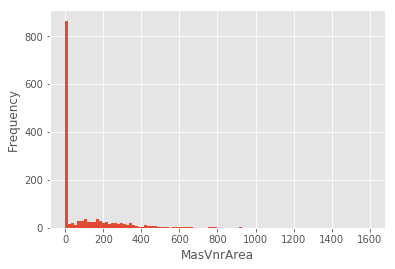

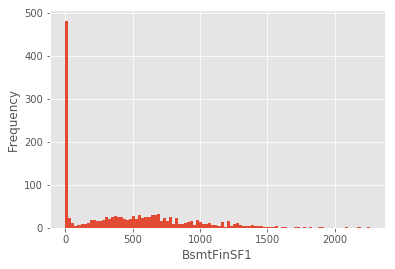

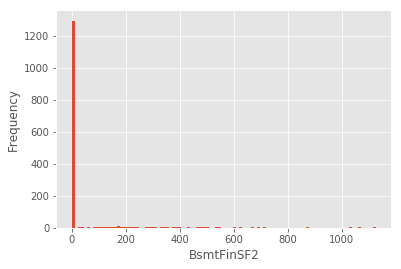

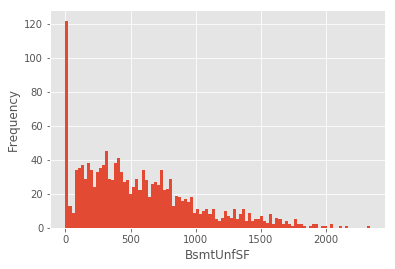

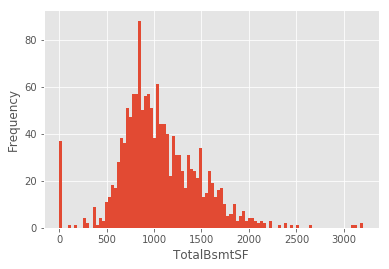

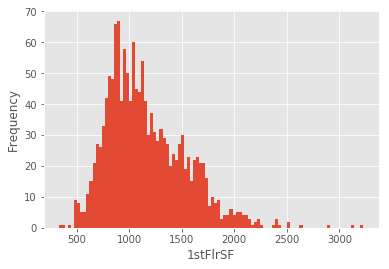

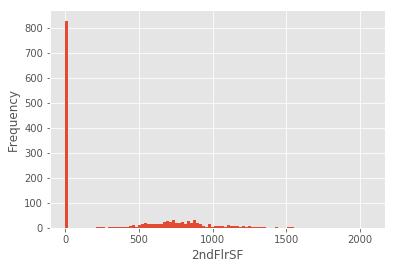

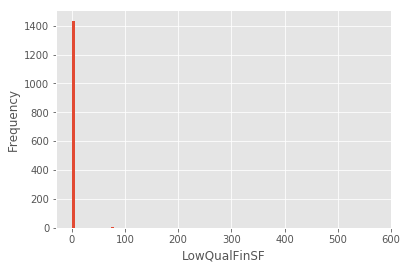

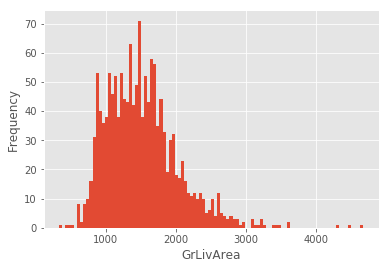

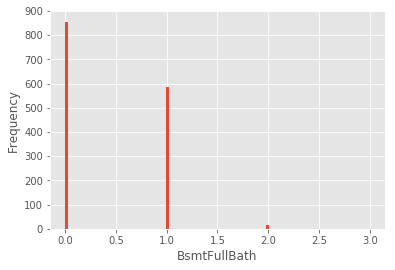

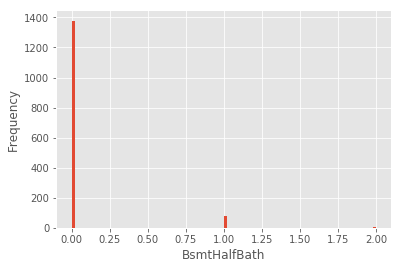

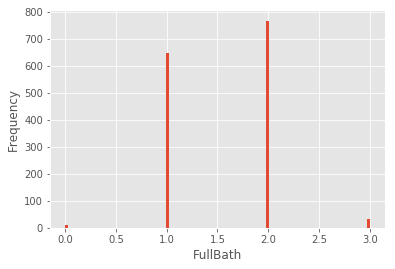

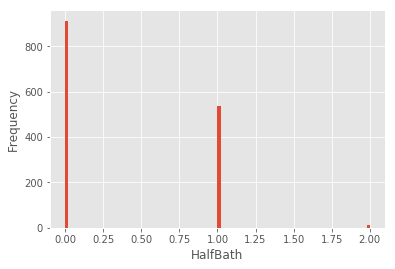

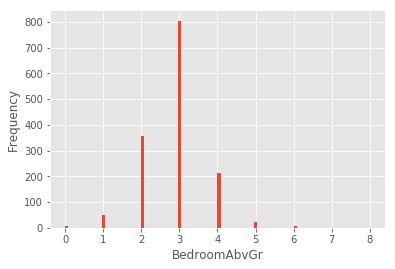

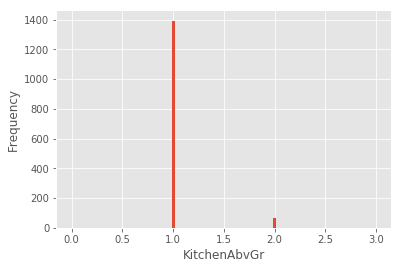

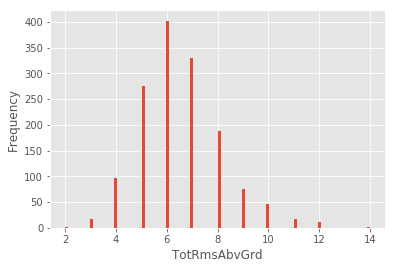

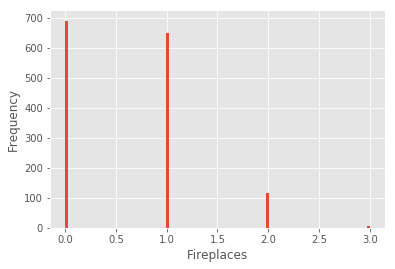

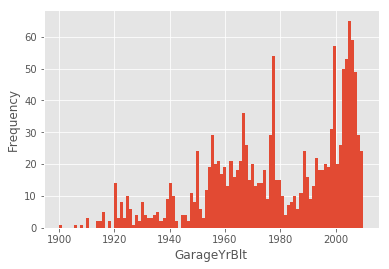

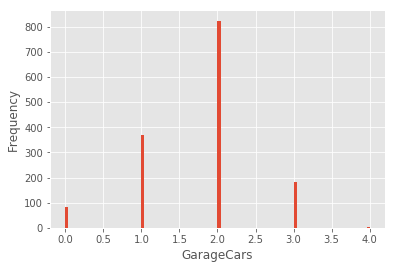

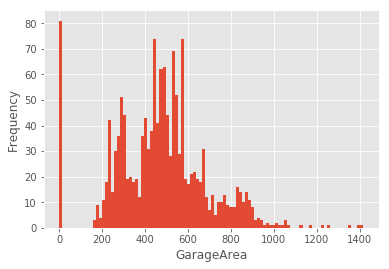

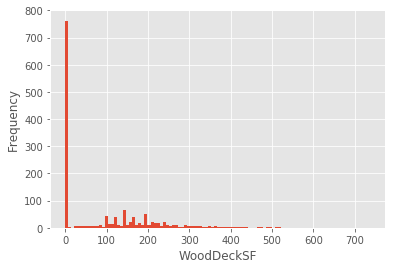

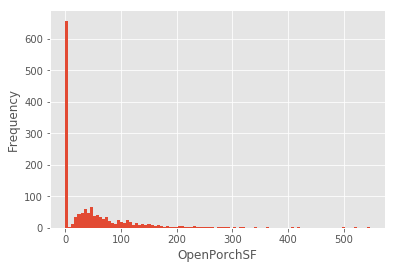

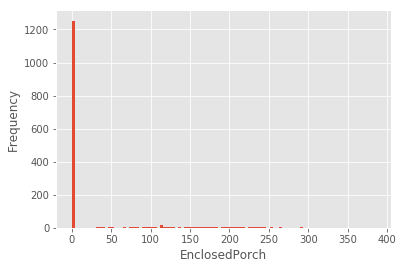

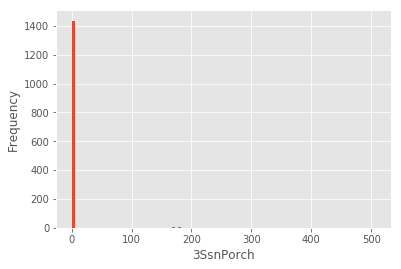

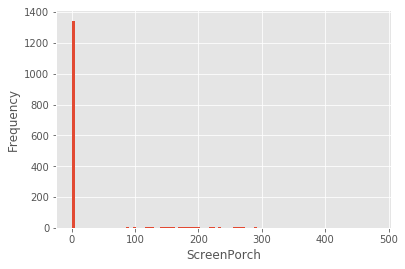

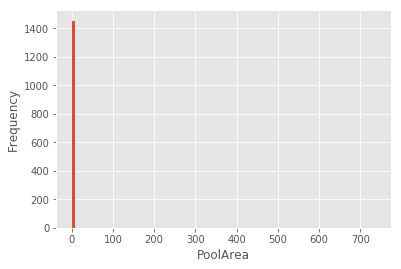

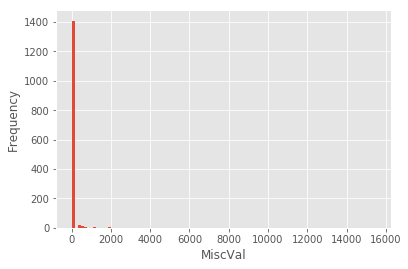

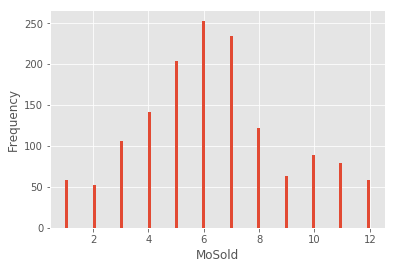

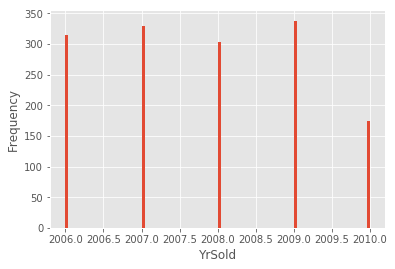

In [30]:
for i in range(len(numeric_cols)):
    X[numeric_cols[i]].plot.hist(bins = 100)
    plt.xlabel(numeric_cols[i])
    plt.show()

In [31]:
#prepro
drop_list_numeric = ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'ScreenPorch']

In [32]:
def prepro_drop_numeric(x):
    x.drop(drop_list_numeric, axis = 1, inplace = True)

prepro_drop_numeric(X)


In [33]:
for i in range(len(categorical_cols)):
    X[categorical_cols[i]].value_counts().plot(kind='bar')
    plt.xlabel(categorical_cols[i])
    plt.show()

In [34]:
drop_list_categorical = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']

In [35]:
def prepro_drop_categorical(x):
    x.drop(drop_list_categorical, axis = 1, inplace = True)


In [36]:
prepro_drop_categorical(X)

In [37]:
numeric_cols = X.select_dtypes(include = [np.number]).columns
categorical_cols = X.select_dtypes([np.object]).columns

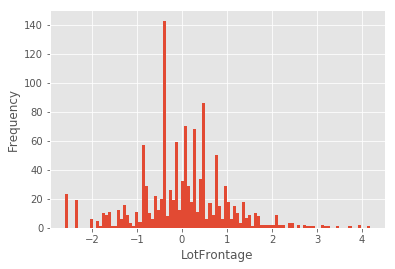

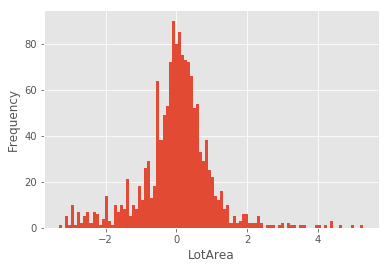

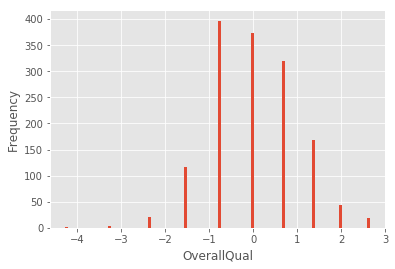

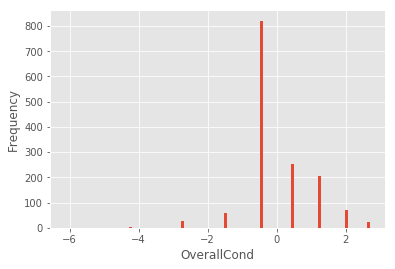

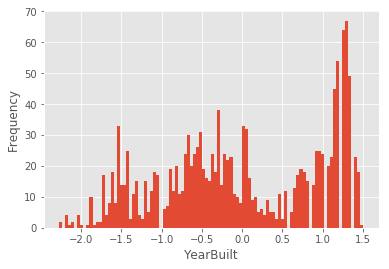

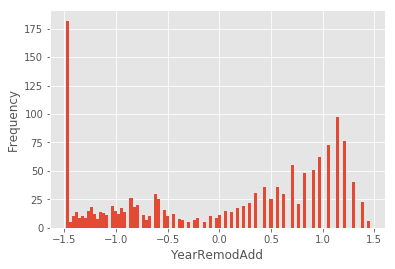

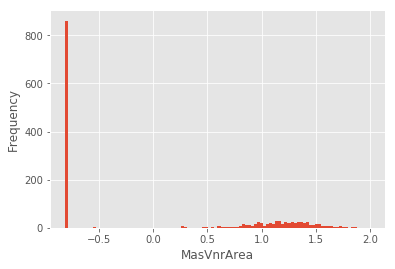

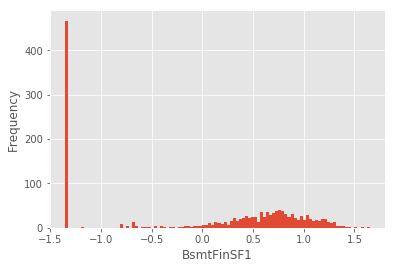

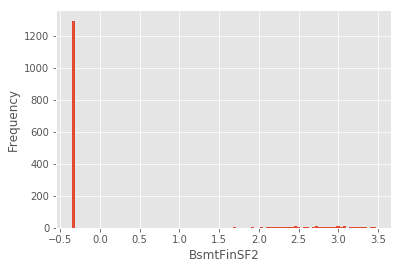

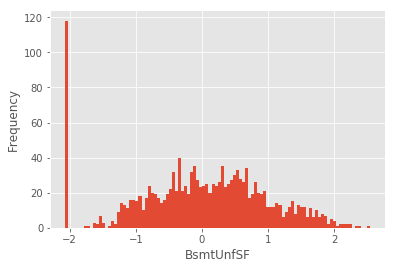

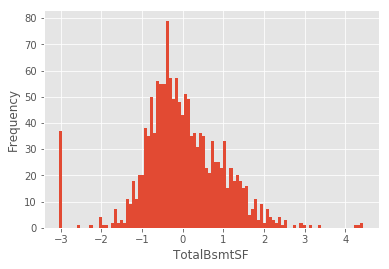

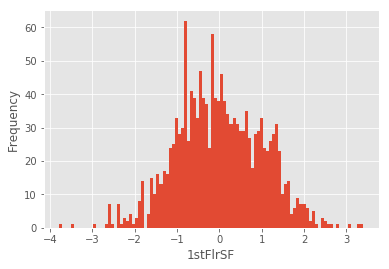

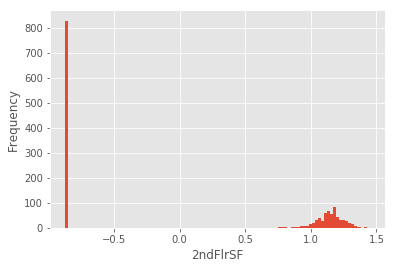

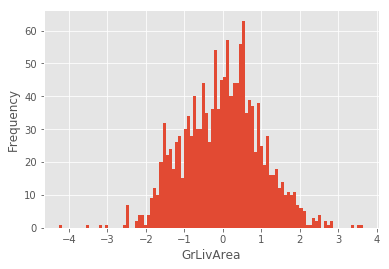

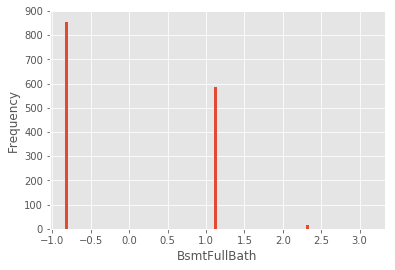

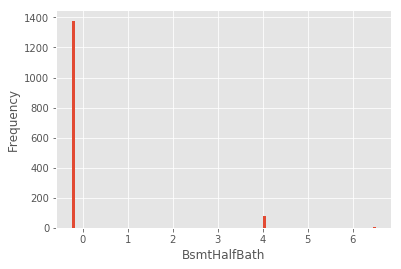

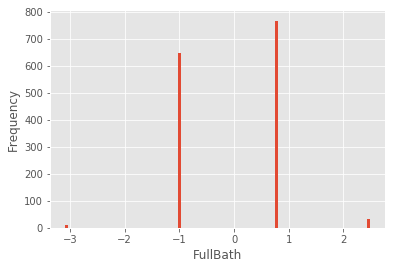

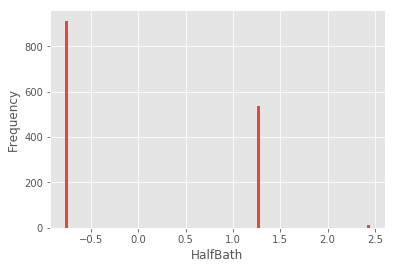

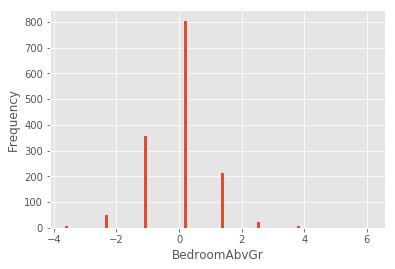

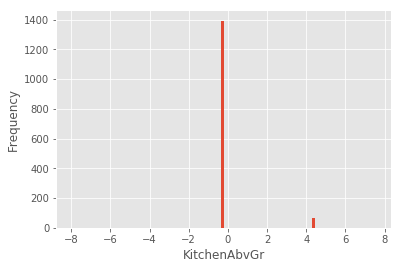

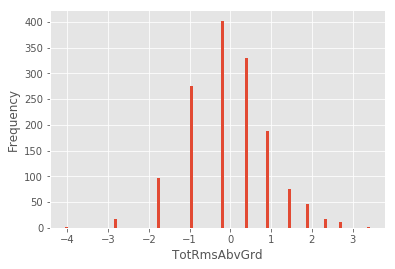

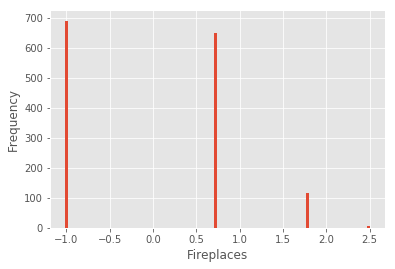

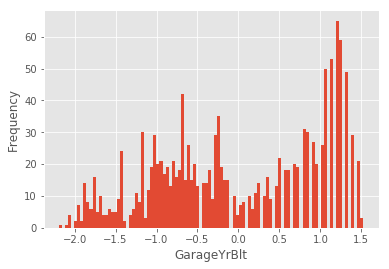

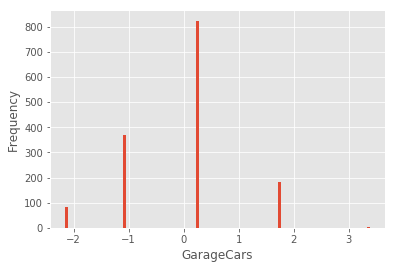

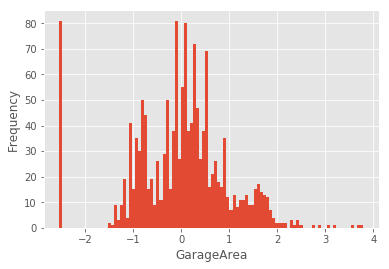

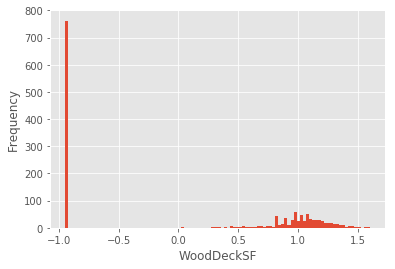

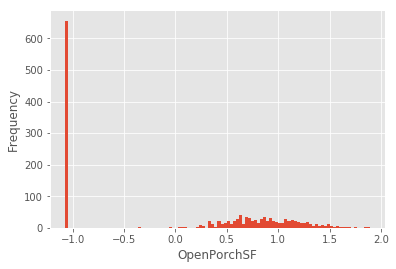

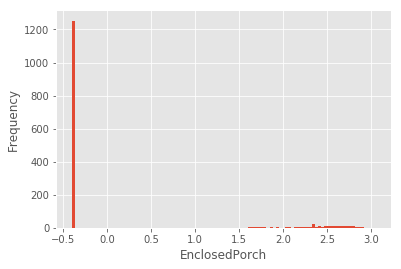

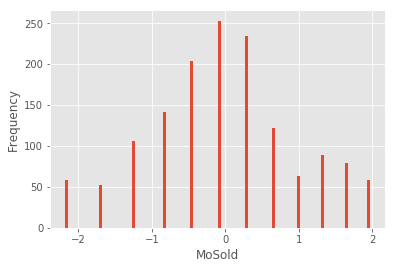

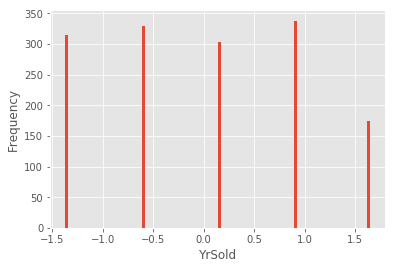

In [38]:
from sklearn.preprocessing import PowerTransformer #(pensar en usar PowerTransformer pero en la oficina no esa disponible)
normal_transformer = PowerTransformer()
normal_transformer.fit(X.loc[:,numeric_cols])
X.loc[:,numeric_cols]=normal_transformer.transform(X.loc[:,numeric_cols])
for i in range(len(numeric_cols)):
    X[numeric_cols[i]].plot.hist(bins = 100)
    plt.xlabel(numeric_cols[i])
    plt.show()

In [39]:
def Numeric_plot(df,column = '', title='',ncols=2,trans_func = None):
    """ Histogram plot Box plot of Numeric variable"""
    
    # Box plot
    trace1 = go.Box(y = df[column],name='Box')
    
    # Histogram
    trace2 = go.Histogram(x = df[column], name = 'x')
    
    fig = tools.make_subplots(rows=1, cols=ncols)
    fig.append_trace(trace1, 1,1)
    fig.append_trace(trace2, 1,2)
    fig['layout'].update(height=300, title=title)
    fig['layout']['yaxis1'].update(title= column)

    # Histogram after transformation
    if trans_func != None:
        tmp = df[column].apply(trans_func)
        trace3 = go.Histogram(x = tmp, name = trans_func+'(x)')
        fig.append_trace(trace3, 1,3)
    
    py.iplot(fig)

In [40]:
def Categorical_plot(df, column ='', title = '',limit=10):
    """ Barplot: of categorical variable
        Boxplot: of categoriucal and taraget variable"""
    # Barplot
    bar = df[column].value_counts()[:limit]/df.shape[0]
    bar_round = [round(w,2) for w in bar.values *100]
    trace1 = go.Bar(x = bar.index, y = bar_round, name='% Count' )    
    # Boxplot
    box = df[column].isin(bar.index[:limit])
    box =df.loc[box][[column,'SalePrice']]
    trace2 = go.Box(x = box[column], y= box['SalePrice'],name='Sale Price')

    # Figure legend
    fig = tools.make_subplots(rows=1, cols=2,)#subplot_titles= ('',''))
    fig.append_trace(trace1, 1,1)
    fig.append_trace(trace2, 1,2)
    
    fig['layout']['yaxis1'].update(title='% Count')
    fig['layout']['yaxis2'].update(title='Sale Price')
    fig['layout'].update(height=400, title=title,showlegend=False)
    py.iplot(fig)

In [41]:
def Regression_plot(df,column=''):
    """Regression plot: with pearsonr correlation value """
    cor = round(df[['SalePrice',column]].corr().iloc[0,1], 3)
    sns.jointplot(x= df[column], y = df['SalePrice'], kind= 'reg',
                  label = 'r: '+str(cor),color='blue')
    plt.legend()
    #plt.title('Regression plot ')

In [42]:
drop_col = []
categorical_col = []
numeric_col = []

In [43]:
Numeric_plot(train, column='SalePrice',title='Sale Price',ncols=3,trans_func='log1p')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



In [44]:
# Run this only once
map_value = {20: '1-STORY 1946 & NEWER ALL STYLES',
            30: '1-STORY 1945 & OLDER',
            40: '1-STORY W/FINISHED ATTIC ALL AGES',
            45: '1-1/2 STORY - UNFINISHED ALL AGES',
            50: '1-1/2 STORY FINISHED ALL AGES',
            60: '2-STORY 1946 & NEWER',
            70: '2-STORY 1945 & OLDER',
            75: '2-1/2 STORY ALL AGES',
            80: 'PLIT OR MULTI-LEVEL',
            85: 'SPLIT FOYER',
            90: 'DUPLEX - ALL STYLES AND AGES',
            120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
            150: '1-1/2 STORY PUD - ALL AGES',
            160: '2-STORY PUD - 1946 & NEWER',
            180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
            190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'}

train['MSSubClass'] = train['MSSubClass'].map(map_value)
test['MSSubClass'] = test['MSSubClass'].map(map_value)

In [45]:
Categorical_plot(train, column='MSSubClass', title='MSSubClass: The building class',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [46]:
# Add to list of categorical column
categorical_col.append('MSSubClass')

In [47]:
map_value = { 
            'A': 'Agriculture',
            'C': 'Commercial',
            'FV': 'Floating Village Residential',
            'I': 'Industrial',
            'RH': 'Residential High Density',
            'RL': 'Residential Low Density',
            'RP': 'Residential Low Density Park',
            'RM': 'Residential Medium Density',
            }
train['MSZoning'] = train['MSZoning'].map(map_value)
test['MSZoning'] = test['MSZoning'].map(map_value)

In [48]:
Categorical_plot(train, column= 'MSZoning', title ='MSZoning: Identifies the general zoning classification of the sale')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [49]:
# Add to list of categorical column
categorical_col.append('MSZoning')

In [50]:
Numeric_plot(train, column= 'LotFrontage', ncols=3, trans_func='log', title='Linear feet of street connected to property')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



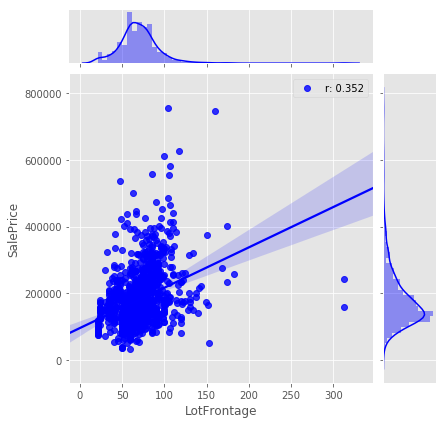

In [51]:
Regression_plot(train, column='LotFrontage')

In [52]:
# Add to list of Numeric column list
numeric_col.append('LotFrontage')


In [53]:
Numeric_plot(train, column = 'LotArea',ncols=3, trans_func='log1p', title='Lot size in square feet')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



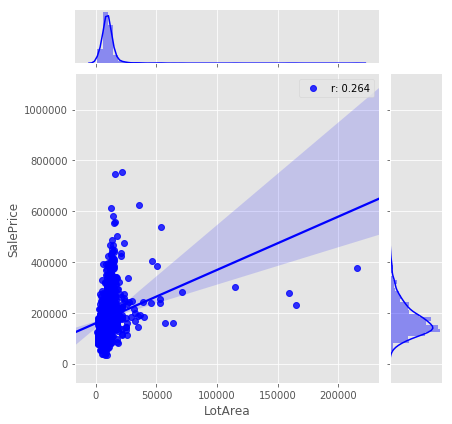

In [54]:
Regression_plot(train, column='LotArea')

In [55]:
Categorical_plot(train, column='Street', title= 'Street: Type of road access to property')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [56]:
# Add to list of Drop column list
drop_col.append('Street')

In [57]:
Categorical_plot(train, column='Alley', title= 'Type of alley access to property')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [58]:
# Add to list of categorical column list
drop_col.append('Alley')

In [59]:
Categorical_plot(train, column='LotShape', title= 'General shape of property')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [60]:
# Add to list of categorical column list
categorical_col.append('LotShape')

In [61]:
Categorical_plot(train, column='LandContour', title= 'Flatness of the property')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [62]:
# Add to list of categorical column list
categorical_col.append('LandContour')

In [63]:
Categorical_plot(train, column='Utilities', title= 'Type of utilities available')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [64]:
# Add to list of Drop column list
drop_col.append('Utilities')

In [65]:
Categorical_plot(train, column='LotConfig', title= 'Lot configuration')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [66]:
# Add to list of categorical column list
categorical_col.append('LotConfig')

In [67]:
Categorical_plot(train, column='LandSlope', title= 'Lot configuration')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [68]:
# Add to list of categorical column list
categorical_col.append('LandSlope')

In [69]:
Categorical_plot(train, column='Neighborhood', title= 'Top 10 Lot configuration',limit=10)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [70]:
# Add to list of categorical column list
categorical_col.append('Neighborhood')

In [71]:
Categorical_plot(train, column='Condition1', title= 'Proximity to various conditions',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [72]:
# Add to list of categorical column list
categorical_col.append('Condition1')

In [73]:
Categorical_plot(train, column='Condition2', title= 'Proximity to various conditions',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [74]:
# Add to list of categorical column list
categorical_col.append('Condition2')

In [75]:
Categorical_plot(train, column='BldgType', title= 'Type of dwelling',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [76]:
# Add to list of categorical column list
categorical_col.append('BldgType')

In [77]:
Categorical_plot(train, column='HouseStyle', title= 'Style of dwelling',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [78]:
# Add to list of categorical column list
categorical_col.append('HouseStyle')

In [79]:
map_values = {10: 'Very Excellent', 
             9: 'Excellent', 
             8: 'Very Good',
             7: 'Good',
             6: 'Above Average',
             5: 'Average',
             4: 'Below Average',
             3: 'Fair',
             2: 'Poor',
             1: 'Very Poor'
            }
train['OverallQual'] = train['OverallQual'].map(map_values)
test['OverallQual'] = test['OverallQual'].map(map_values)

In [80]:
Categorical_plot(train, column='OverallQual', title= 'Rates the overall material and finish of the house',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [81]:
# Add to list of categorical column list
categorical_col.append('OverallQual')

In [82]:
map_values = {10: 'Very Excellent', 
             9: 'Excellent', 
             8: 'Very Good',
             7: 'Good',
             6: 'Above Average',
             5: 'Average',
             4: 'Below Average',
             3: 'Fair',
             2: 'Poor',
             1: 'Very Poor'
            }
train['OverallCond'] = train['OverallCond'].map(map_values)
test['OverallCond'] = test['OverallCond'].map(map_values)

In [83]:
Categorical_plot(train, column='OverallCond', title= 'Rates the overall condition of the house',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [84]:
# Add to list of categorical column list
categorical_col.append('OverallCond')

In [85]:
Numeric_plot(train, column='YearBuilt', title= 'Original construction date', ncols=2,)# trans_func='sqrt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



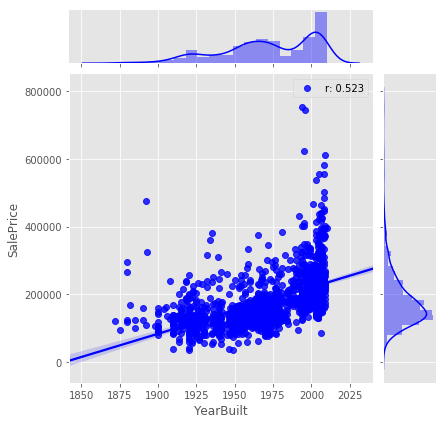

In [86]:
Regression_plot(train, column='YearBuilt')

In [87]:
# Add to numeric column list
numeric_col.append('YearBuilt')

In [88]:
Numeric_plot(train, column='YearRemodAdd', title= 'Remodel date', ncols=2,)# trans_func='log')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



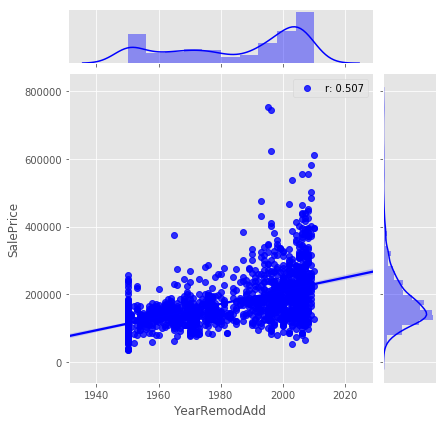

In [89]:
Regression_plot(train, column='YearRemodAdd')

In [90]:
# Add to numeric column list
numeric_col.append('YearRemodAdd')

In [91]:
Categorical_plot(train, column='RoofStyle', title= 'Type of roof',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [92]:
# Add to list of categorical column list
categorical_col.append('RoofStyle')

In [93]:
Categorical_plot(train, column='RoofMatl', title= 'Roof material',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [94]:
# Add to list of drop column list
drop_col.append('RoofMatl')

In [95]:
Categorical_plot(train, column='Exterior1st', title= 'Exterior covering on house',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [96]:
# Add to list of categorical column list
categorical_col.append('Exterior1st')

In [97]:
Categorical_plot(train, column='Exterior2nd', title= 'Exterior covering on house',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [98]:
# Add to list of categorical column list
categorical_col.append('Exterior2nd')

In [99]:
Categorical_plot(train, column='MasVnrType', title= 'Masonry veneer type',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [100]:
# Add to list of categorical column list
categorical_col.append('MasVnrType')

In [101]:
Numeric_plot(train, column= 'MasVnrArea', title= 'Masonry veneer area in square feet',) #ncols=3, trans_func='sqrt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



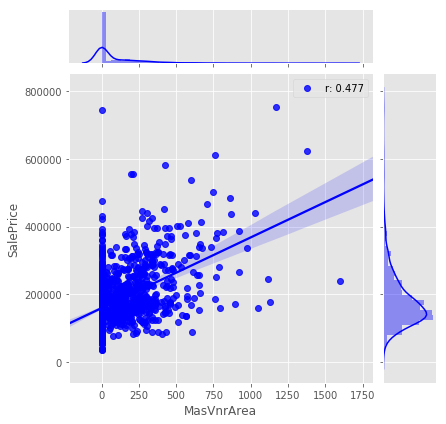

In [102]:
Regression_plot(train, column='MasVnrArea')

In [103]:
# Add to list of numeric column list
numeric_col.append('MasVnrArea')

In [104]:
map_values = { 
            'Ex': 'Excellent',
            'Gd': 'Good',
            'TA': 'Average/Typical',
            'Fa': 'Fair',
            'Po': 'Poor'
            }
train['ExterQual'] = train['ExterQual'].map(map_values)
test['ExterQual'] = test['ExterQual'].map(map_values)

In [105]:
Categorical_plot(train, column='ExterQual', title= 'Evaluates the quality of the material on the exterior',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [106]:
# Add to list of categorical column list
categorical_col.append('ExterQual')

In [107]:
map_values = { 
            'Ex': 'Excellent',
            'Gd': 'Good',
            'TA': 'Average/Typical',
            'Fa': 'Fair',
            'Po': 'Poor'
            }
train['ExterCond'] = train['ExterCond'].map(map_values)
test['ExterCond'] = test['ExterCond'].map(map_values)

In [108]:
Categorical_plot(train, column='ExterCond', title= 'Evaluates the present condition of the material on the exterior',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [109]:
# Add to list of categorical column list
categorical_col.append('ExterCond')

In [110]:
Categorical_plot(train, column='Foundation', title= 'Type of foundation',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [111]:
# Add to list of categorical column list
categorical_col.append('Foundation')

In [112]:
Categorical_plot(train, column='BsmtQual', title= 'Evaluates the height of the basement',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [113]:
# Add to list of categorical column list
categorical_col.append('BsmtQual')

In [114]:
Categorical_plot(train, column='BsmtCond', title= 'Evaluates the general condition of the basement',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [115]:
# Add to list of categorical column list
categorical_col.append('BsmtCond')

In [116]:
Categorical_plot(train, column='BsmtExposure', title= 'Refers to walkout or garden level walls',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [117]:
# Add to list of categorical column list
categorical_col.append('BsmtExposure')

In [118]:
Categorical_plot(train, column='BsmtFinType1', title= 'Rating of basement finished area',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [119]:
# Add to list of categorical column list
categorical_col.append('BsmtFinType1')

In [120]:
Numeric_plot(train, column='BsmtFinSF1', title='Type 1 finished square feet')#,ncols=3, trans_func='log1p')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



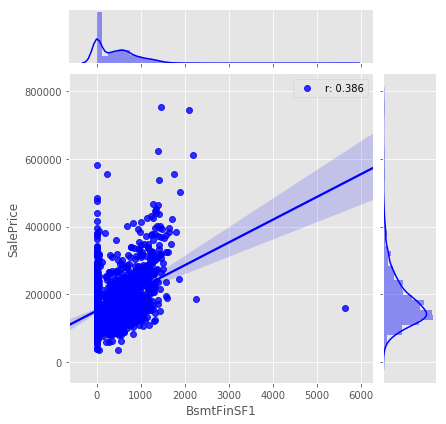

In [121]:
Regression_plot(train, column= 'BsmtFinSF1')

In [122]:
# Add to list of numeric column list
numeric_col.append('BsmtFinSF1')

In [123]:
Categorical_plot(train, column='BsmtFinType2', title= 'Rating of basement finished area',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [124]:
# Add to list of categorical column list
categorical_col.append('BsmtFinType2')

In [125]:
Numeric_plot(train, column='BsmtFinSF2', title='Type 2 finished square feet')#,ncols=3, trans_func='log1p')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



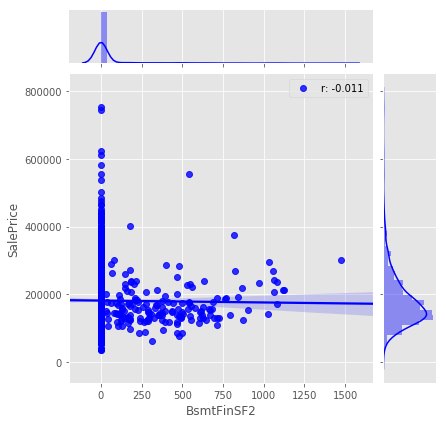

In [126]:
Regression_plot(train, column= 'BsmtFinSF2')

In [127]:
# Add to list of numeric column list
numeric_col.append('BsmtFinSF2')

In [128]:
Numeric_plot(train, column='BsmtUnfSF', title='Unfinished square feet of basement area')#,ncols=3, trans_func='log1p')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



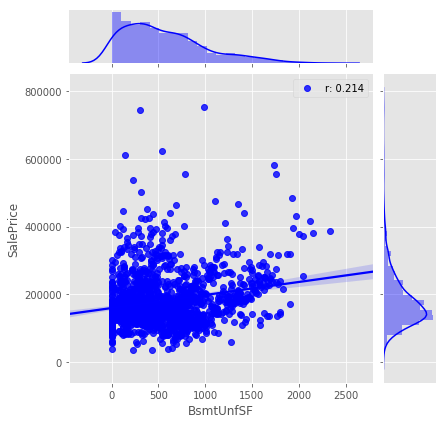

In [129]:
Regression_plot(train, column= 'BsmtUnfSF')

In [130]:
# Add to list of numeric column list
numeric_col.append('BsmtUnfSF')

In [131]:
Numeric_plot(train, column='TotalBsmtSF', title='Total square feet of basement area')#,ncols=3, trans_func='log1p')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



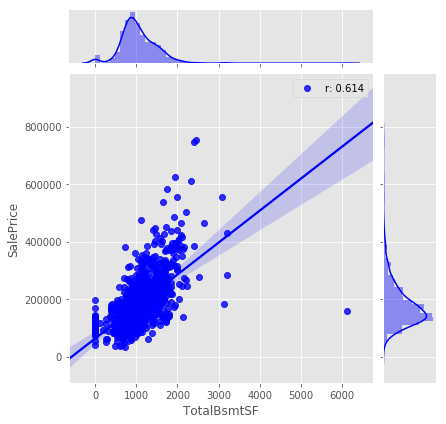

In [132]:
Regression_plot(train, column= 'TotalBsmtSF')

In [133]:
# Add to list of numeric column list
numeric_col.append('TotalBsmtSF')

In [134]:
Categorical_plot(train, column='Heating', title= 'Type of heating',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [135]:
# Add to list of dro column list
drop_col.append('Heating')

In [136]:
Categorical_plot(train, column='HeatingQC', title= 'Heating quality and condition',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [137]:
# Add to list of categorical column list
categorical_col.append('HeatingQC')

In [138]:
Categorical_plot(train, column='CentralAir', title= 'Central air conditioning',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [139]:
# Add to list of categorical column list
categorical_col.append('CentralAir')

In [140]:
Categorical_plot(train, column='Electrical', title= 'Electrical system',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [141]:
# Add to list of categorical column list
categorical_col.append('Electrical')

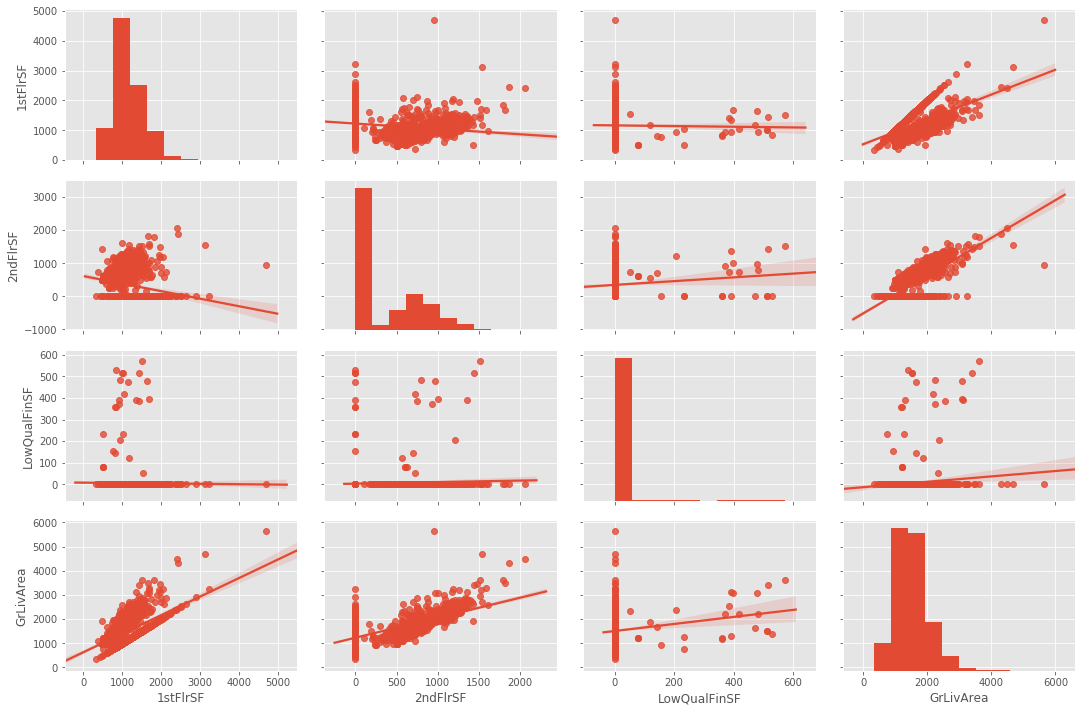

In [142]:
g = sns.pairplot(train, vars=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'],
                palette = 'viridis', kind= 'reg', aspect=1.5)

In [143]:
# Add to
numeric_col.extend(['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'])

In [144]:
Categorical_plot(train, column='BsmtFullBath', title= 'Basement full bathrooms',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [145]:
# Add to list of categorical column list
categorical_col.append('BsmtFullBath')

In [146]:
Categorical_plot(train, column='BsmtHalfBath', title= 'Basement half bathrooms',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [147]:
# Add to list of categorical column list
categorical_col.append('BsmtHalfBath')

In [148]:
Categorical_plot(train, column='FullBath', title= ' Full bathrooms above grade',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [149]:
# Add to list of categorical column list
categorical_col.append('FullBath')

In [150]:
Categorical_plot(train, column='HalfBath', title= 'Half baths above grade',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [151]:
# Add to list of categorical column list
categorical_col.append('HalfBath')

In [152]:
Categorical_plot(train, column='BedroomAbvGr', title= 'Bedrooms above grade',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [153]:
# Add to list of categorical column list
categorical_col.append('BedroomAbvGr')

In [154]:
Categorical_plot(train, column='KitchenAbvGr', title= 'Kitchens above grade',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [155]:
# Add to list of categorical column list
categorical_col.append('KitchenAbvGr')

In [156]:
Categorical_plot(train, column='KitchenQual', title= 'Kitchen quality',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [157]:
# Add to list of categorical column list
categorical_col.append('KitchenQual')

In [158]:
Categorical_plot(train, column='TotRmsAbvGrd', title= 'Total rooms above grade',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [159]:
# Add to list of categorical column list
categorical_col.append('KitchenQual')

In [160]:
Categorical_plot(train, column='Functional', title= 'Home functionality',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [161]:
# Add to list of categorical column list
categorical_col.append('Functional')

In [162]:
Categorical_plot(train, column='Fireplaces', title= 'Number of fireplaces',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [163]:
# Add to list of categorical column list
categorical_col.append('Fireplaces')

In [164]:
Categorical_plot(train, column='FireplaceQu', title= 'Fireplace quality',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [165]:
# Add to list of categorical column list
categorical_col.append('FireplaceQu')

In [166]:
Categorical_plot(train, column='GarageType', title= 'Garage location',limit=None)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [167]:
# Add to list of categorical column list
categorical_col.append('GarageType')

In [168]:
Numeric_plot(train, column='GarageYrBlt', title= 'Year garage was built')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [169]:
# Add to list of Numeric column list
numeric_col.append('GarageYrBlt')

In [170]:
Categorical_plot(train, column='GarageFinish', title= 'Interior finish of the garage')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [171]:
# Add to list of calegtory column list
categorical_col.append('GarageFinish')

In [172]:
Categorical_plot(train, column='GarageCars', title= 'Size of garage in car capacity')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [173]:
# Add to list of calegtory column list
categorical_col.append('GarageCars')

In [174]:
Numeric_plot(train, column='GarageArea', title= 'Size of garage in square feet')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [175]:
# Add to list of numeric column list
numeric_col.append('GarageArea')

In [176]:
Categorical_plot(train, column='GarageQual', title= 'Garage quality')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [177]:
# Add to list of calegtory column list
categorical_col.append('GarageQual')

In [178]:
Categorical_plot(train, column='GarageCond', title= 'Garage condition')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [179]:
# Add to list of calegtory column list
categorical_col.append('GarageCond')

In [180]:
Categorical_plot(train, column='PavedDrive', title= 'Paved driveway')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [181]:
# Add to list of calegtory column list
categorical_col.append('PavedDrive')

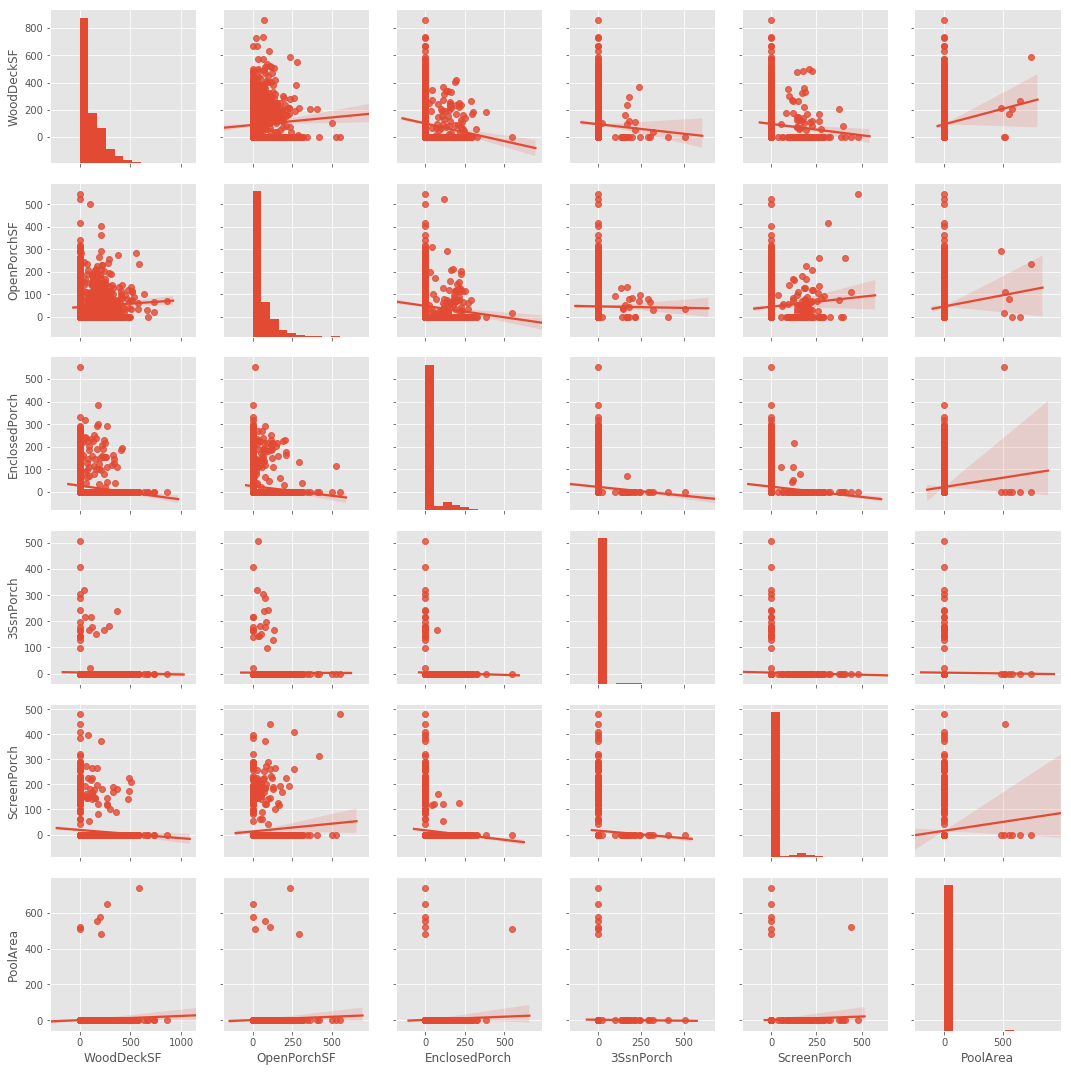

In [182]:
g = sns.pairplot(data= train, kind= 'reg',
                 vars= ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'],)

In [183]:
# Add to
numeric_col.extend(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'])

In [184]:
Categorical_plot(train, column='PoolQC', title= 'Pool quality')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [185]:
# Add to list of calegtory column list
drop_col.append('PoolQC')

In [186]:
Categorical_plot(train, column='Fence', title= 'Fence quality')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [187]:
# Add to list of calegtory column list
categorical_col.append('Fence')

In [188]:
Categorical_plot(train, column='MiscFeature', title= 'Miscellaneous feature not covered in other categories')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [189]:
# Add to list of drop column list
drop_col.append('MiscFeature')

In [190]:
Numeric_plot(train, column='MiscVal', title='$Value of miscellaneous feature',)# ncols=3, trans_func='log1p')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [191]:
# Add to numeric column list
numeric_col.append('MiscVal')

In [192]:
Categorical_plot(train, column='MoSold', title='Month Sold (MM)',)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [193]:
# Add to categorical column list
categorical_col.append('MoSold')

In [194]:
Categorical_plot(train, column='YrSold', title='Year Sold',)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [195]:
# Add to categorical column list
categorical_col.append('YrSold')

In [196]:
Categorical_plot(train, column='SaleType', title='Type of sale',)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [197]:
# Add to categorical column list
categorical_col.append('SaleType')

In [198]:
Categorical_plot(train, column='SaleCondition', title='Condition of sale',)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [199]:
# Add to categorical column list
categorical_col.append('SaleCondition')

In [200]:
# Check column 
print('Check number of column',train.shape, len(categorical_col)+len(drop_col)+len(numeric_col))
train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

Check number of column (1460, 81) 78


In [201]:
test['SalePrice'] = np.nan

In [202]:
train_test = pd.concat([train, test], axis =0)
train_test.shape

(2919, 74)

In [203]:
def Binary_encoding(df,columns):
    """Binary encoding"""
    print('*'*5,'Binary encoding','*'*5)
    lb = LabelBinarizer()
    print('Original shape:',df.shape)
    original_col = df.columns
    #columns = [i for i in columns if df[columns].nunique()>2]
    for i in columns:
        if df[i].nunique() >2:
            result = lb.fit_transform(df[i].fillna(df[i].mode()[0],axis=0))
            col = ['BIN_'+ str(i)+'_'+str(c) for c in lb.classes_]
            result1 = pd.DataFrame(result, columns=col)
            df = df.join(result1)
    print('After:',df.shape)
    #new_col = [c for c in df.columns if c not in original_col]
    return df

In [204]:
def OneHotEncoding(df, columns, nan_as_category=True, drop_first=True):
    """One Hot Encoding: of categorical variable"""
    print(10*'*'+'One Hot Encoding:',df.shape,10*'*')
    lenght = df.shape[0]
    # Concatenate dataframe
    #df = pd.concat([df1,df2], axis=0)
    
    # OHE
    df = pd.get_dummies(data = df, columns= columns, drop_first=drop_first, 
                        dummy_na=nan_as_category)
    
    print(10*'*','After One Hot Encoding:',df.shape,10*'*')
    return df

In [205]:
train_test = OneHotEncoding(train_test, columns=categorical_col)

**********One Hot Encoding: (2919, 74) **********
********** After One Hot Encoding: (2919, 327) **********


In [206]:
def Fill_missing_value(df,column):
    """Fill missing value with Mean"""
    for c in column:
        if df[c].isnull().sum() >0:
            df[c] = df[c].fillna(df[c].mean())
    print('Check Missing value:',df.isnull().sum().sum())
    return df

In [207]:
train_test = Fill_missing_value(train_test,numeric_col)

Check Missing value: 1459


In [208]:
def Descriptive_stat_feat(df,columns):
    """ Descriptive statistics feature
    genarating function: Mean,Median,Q1,Q3"""
    print('*'*5,'Descriptive statistics feature','*'*5)
    print('Before',df.shape)
    mean = df[columns].mean()
    median = df[columns].median()
    Q1 = np.percentile(df[columns], 25, axis=0)
    Q3 = np.percentile(df[columns], 75, axis=0)
    for i,j in enumerate(columns):
        df['mean_'+j] = (df[j] < mean[i]).astype('int8')
        df['median_'+j] = (df[j] > median[i]).astype('int8')
        df['Q1'+j] = (df[j] < Q1[i]).astype('int8')
        df['Q3'+j] = (df[j] > Q3[i]).astype('int8')
    print('After ',df.shape)
    return df

In [209]:
train_test = Descriptive_stat_feat(train_test, columns = numeric_col)

***** Descriptive statistics feature *****
Before (2919, 327)
After  (2919, 411)


In [210]:
train_test.isnull().sum().sum()

1459

In [211]:
length = train.shape[0]
test_id = test['Id']
train1 = train_test[:length]
test1 = train_test[length:]
X = train1.drop(['Id','SalePrice'], axis=1)
y = np.log1p(train1['SalePrice'])
new_test = test1.drop(['Id','SalePrice'], axis=1)
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=seed)
del train1, test1

In [212]:
from sklearn.model_selection import RandomizedSearchCV
reg = Ridge(alpha= 1.0)
rsCV = RandomizedSearchCV(reg,cv= 5,param_distributions={'alpha':np.linspace(0,20,100)},random_state= seed)
rsCV.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'alpha': array([ 0.     ,  0.20202, ..., 19.79798, 20.     ])},
          pre_dispatch='2*n_jobs', random_state=4432, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [213]:
rsCV.best_params_

{'alpha': 8.686868686868687}

In [214]:
kf = KFold(n_splits=5, random_state=seed,)

final_pred = 0
rmse = []
r_square = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Modelling {i+1} of {kf.n_splits} fold')
    X_train, X_valid = X.loc[train_index], X.loc[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    
    # L2 - Regression
    reg = Ridge(alpha = rsCV.best_params_['alpha'])
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_valid)
    final_pred += reg.predict(new_test)
    r2 = reg.score(X_valid, y_valid)
    r_square.append(r2)
    print('*'*10,'R sqaure:',round(r2,3), '*'*10,'\n')
    rmse.append(mean_squared_error(y_valid, y_pred)**0.5)

Modelling 1 of 5 fold
********** R sqaure: 0.908 ********** 

Modelling 2 of 5 fold
********** R sqaure: 0.873 ********** 

Modelling 3 of 5 fold
********** R sqaure: 0.896 ********** 

Modelling 4 of 5 fold
********** R sqaure: 0.895 ********** 

Modelling 5 of 5 fold
********** R sqaure: 0.79 ********** 



In [215]:
print(rmse,'\nRMSE:',np.mean(rmse))

[0.11730934552048036, 0.15166997636755916, 0.13193449717323827, 0.12305124830057557, 0.1792190689208815] 
RMSE: 0.14063682725654697


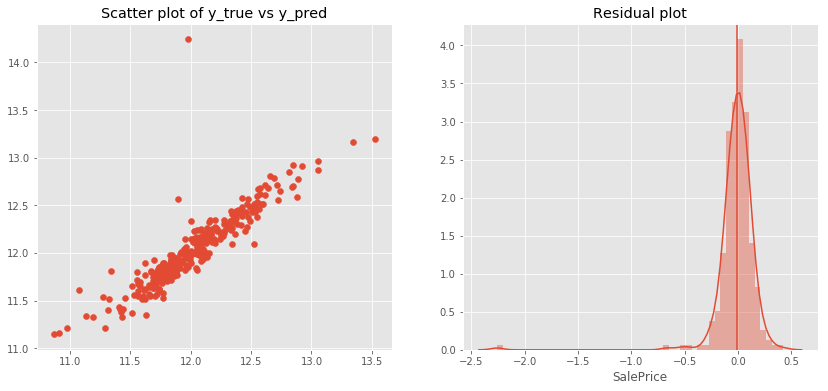

In [216]:
f = plt.figure(figsize= (14,6))

ax = f.add_subplot(121)
ax.scatter(y_valid, y_pred)
plt.title('Scatter plot of y_true vs y_pred')

residual = y_valid - y_pred
ax = f.add_subplot(122)
sns.distplot(residual, ax = ax)
plt.axvline(residual.mean())
plt.title('Residual plot');

In [217]:
#pred = reg.predict(new_test)
pred = np.expm1(final_pred/ kf.n_splits)
submit = pd.DataFrame({'Id':test_id,'SalePrice':pred})
submit.to_csv('houseprice.csv',index= False)
print('Shape: ',submit.shape)
submit.head()

Shape:  (1459, 2)


Id      SalePrice
0  1461  122602.712620
1  1462  167470.949625
2  1463  200212.851619
3  1464  211510.273995
4  1465  187514.637574

In [218]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators':[200, 500, 1000,2000],
    'learning_rate': np.linspace(0.001, 1, 10),
    'max_depth': [3,5,7,8,10],
    'num_leaves': [32, 64, 128],
    'feature_fraction': np.linspace(0.7,1,5),
    'bagging_fraction': np.linspace(0.6,1,5),
    'lambda_l1': np.linspace(0,1,20),
    'lambda_l2': np.linspace(0,1,20),
}

lgb_reg = lgb.LGBMRegressor(eval_metric ='mse',)
rsCV = RandomizedSearchCV(lgb_reg,cv= 5,param_distributions= param,random_state= seed)
rsCV.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       eval_metric='mse', importance_type='split', learning_rate=0.1,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
       objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [200, 500, 1000, 2000], 'learning_rate': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]), 'max_depth': [3, 5, 7, 8, 10], 'num_leaves': [32, 64, 128], 'feature_fraction': array([0.7  , 0.775, 0.85 , 0.925, 1.   ]), 'bagging_fra..., 0.52632, 0.57895, 0.63158, 0.68421,
       0.73684, 0.78947, 0.84211, 0.89474, 0.94737, 1.     ])},

In [219]:
rsCV.best_params_

{'num_leaves': 64,
 'n_estimators': 2000,
 'max_depth': 3,
 'learning_rate': 0.223,
 'lambda_l2': 0.3157894736842105,
 'lambda_l1': 0.7368421052631579,
 'feature_fraction': 1.0,
 'bagging_fraction': 0.8}

In [220]:
# Lightgbm
def model(X_train, X_valid, y_train, y_valid,test_new,random_seed, param):
    
    lg_param = {}
    lg_param['learning_rate'] = param['learning_rate']
    lg_param['n_estimators'] = param['n_estimators']
    lg_param['max_depth'] = param['max_depth']
    #lg_param['num_leaves'] = param['num_leaves']
    lg_param['boosting_type'] = 'gbdt'
    lg_param['feature_fraction'] = param['feature_fraction']
    lg_param['bagging_fraction'] = param['bagging_fraction']
    lg_param['lambda_l1'] = param['lambda_l1']
    lg_param['lambda_l2'] = param['lambda_l2']
    lg_param['silent'] = -1
    lg_param['verbose'] = -1
    lg_param['nthread'] = 4
    lg_param['seed'] = random_seed
    
    lgb_model = lgb.LGBMRegressor(**lg_param)
    print('-'*10,'*'*20,'-'*10)
    lgb_model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid,y_valid)], 
                 eval_metric ='mse', verbose =100, early_stopping_rounds=50)
    y_pred = lgb_model.predict(X_valid)
    y_pred_new = lgb_model.predict(test_new)
    return y_pred,y_pred_new,lgb_model

In [221]:
kf = KFold(n_splits=5, random_state=seed,)

final_pred = 0
rmse = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Modelling {i+1} of {kf.n_splits} fold')
    X_train, X_valid = X.loc[train_index], X.loc[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    
    # GBM Regression
    print('\n{} fold of {} KFold'.format(i+1,kf.n_splits))
    y_pred,y_pred_new,lgb_model = model(X_train, X_valid, y_train, y_valid,new_test,random_seed = i,
                                    param = rsCV.best_params_)
    final_pred += y_pred_new
    rmse.append(mean_squared_error(y_valid, y_pred)**0.5)
    #print('*'*10,'Rmse:',round(r2,3), '*'*10,'\n')

Modelling 1 of 5 fold

1 fold of 5 KFold
---------- ******************** ----------
Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 0.00791731	training's l2: 0.00791731	valid_1's l2: 0.0189985	valid_1's l2: 0.0189985
[200]	training's l2: 0.00534294	training's l2: 0.00534294	valid_1's l2: 0.0187421	valid_1's l2: 0.0187421
Early stopping, best iteration is:
[197]	training's l2: 0.00538594	training's l2: 0.00538594	valid_1's l2: 0.0187124	valid_1's l2: 0.0187124
Modelling 2 of 5 fold

2 fold of 5 KFold
---------- ******************** ----------
Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 0.00785228	training's l2: 0.00785228	valid_1's l2: 0.0255614	valid_1's l2: 0.0255614
[200]	training's l2: 0.00546084	training's l2: 0.00546084	valid_1's l2: 0.0253145	valid_1's l2: 0.0253145
Early stopping, best iteration is:
[198]	training's l2: 0.00550292	training's l2: 0.00550292	valid_1's l2: 0.025295	valid_1's l2: 0.025295
Mode

In [222]:
print(rmse,'\nRMSE:',np.mean(rmse))

[0.13679317236748462, 0.15904394969211588, 0.13829076630353143, 0.1307508979275385, 0.1383122133536261] 
RMSE: 0.14063819992885931


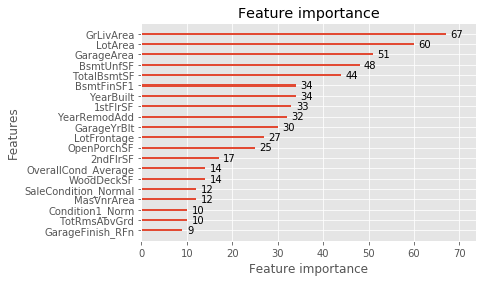

In [223]:
lgb.plot_importance(lgb_model,max_num_features=20)

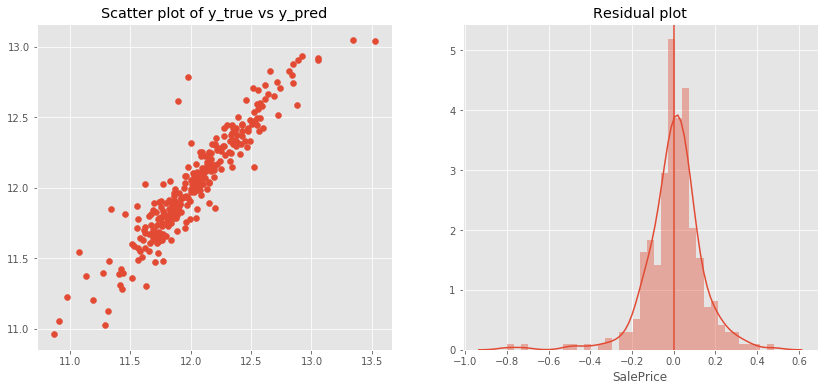

In [224]:
f = plt.figure(figsize= (14,6))

ax = f.add_subplot(121)
ax.scatter(y_valid, y_pred)
plt.title('Scatter plot of y_true vs y_pred')

residual = y_valid - y_pred
ax = f.add_subplot(122)
sns.distplot(residual, ax = ax)
plt.axvline(residual.mean())
plt.title('Residual plot');

In [225]:
#pred = reg.predict(new_test)
pred = np.expm1(final_pred/ kf.n_splits)
submit = pd.DataFrame({'Id':test_id,'SalePrice':pred})
submit.to_csv('houseprice_lgb.csv',index= False)
print('Shape: ',submit.shape)
submit.head()

Shape:  (1459, 2)


Id      SalePrice
0  1461  124799.053639
1  1462  158265.668433
2  1463  192660.249675
3  1464  195310.456492
4  1465  190971.006841